In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pmdarima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [2]:
ASIANPAINTS= pd.read_csv("https://www.quandl.com/api/v3/datasets/BSE/BOM500820.csv?api_key=fkE46js49xitRtpvX6my")
#ASIANPAINTS = quandl.get("BSE/BOM500820", authtoken="fkE46js49xitRtpvX6my")

In [3]:
ASIANPAINTS.set_index("Date", inplace=True)

In [4]:
ASIANPAINTS.sort_index(axis=0,ascending=True, inplace=True )

In [5]:
ASIANPAINTS.info()
ASIANPAINTS.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7181 entries, 1991-01-03 to 2020-09-15
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       7181 non-null   float64
 1   High                       7181 non-null   float64
 2   Low                        7181 non-null   float64
 3   Close                      7181 non-null   float64
 4   WAP                        7181 non-null   float64
 5   No. of Shares              7181 non-null   float64
 6   No. of Trades              7181 non-null   float64
 7   Total Turnover             7181 non-null   float64
 8   Deliverable Quantity       4615 non-null   float64
 9   % Deli. Qty to Traded Qty  4615 non-null   float64
 10  Spread H-L                 7181 non-null   float64
 11  Spread C-O                 7181 non-null   float64
dtypes: float64(12)
memory usage: 729.3+ KB


,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1991-01-03,215.0,232.5,215.0,227.50,0.0,0.0,0.0,0.0,NaN,NaN,17.5,12.50
1991-01-07,232.5,232.5,220.0,227.50,0.0,0.0,0.0,0.0,NaN,NaN,12.5,-5.00
1991-01-09,227.5,230.0,225.0,228.75,0.0,0.0,0.0,0.0,NaN,NaN,5.0,1.25
1991-01-11,225.0,230.0,225.0,230.00,0.0,0.0,0.0,0.0,NaN,NaN,5.0,5.00
1991-01-14,230.0,230.0,227.5,227.50,0.0,0.0,0.0,0.0,NaN,NaN,2.5,-2.50


In [6]:
ASIANPAINTS['OHLC']=(ASIANPAINTS.Open+ASIANPAINTS.High+ASIANPAINTS.Low+ASIANPAINTS.Close)/4

In [7]:
ASIANPAINTS.reset_index(inplace=True)

In [8]:
print(ASIANPAINTS[ASIANPAINTS.Open==5078.90].index.values)

[5420]


In [9]:
set1 = ASIANPAINTS[:ASIANPAINTS[ASIANPAINTS.Open==5078.90].index.values[0]+1] # prior to facevalue change
set2 = ASIANPAINTS[ASIANPAINTS[ASIANPAINTS.Open==5078.90].index.values[0]+1:]

In [10]:
set1.Open = set1.Open/10
set1.High = set1.High/10
set1.Low = set1.Low/10
set1.Close = set1.Close/10
set1.OHLC = set1.OHLC/10
set1['Spread C-O'] = set1['Spread C-O']/10
set1['Spread H-L'] = set1['Spread H-L']/10

C:\Users\e4nwck2\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\e4nwck2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\e4nwck2\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [11]:
set1

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,OHLC
0,1991-01-03,21.500,23.250,21.500,22.750,0.000000,0.0,0.0,0.0,NaN,NaN,1.750,1.250,22.25000
1,1991-01-07,23.250,23.250,22.000,22.750,0.000000,0.0,0.0,0.0,NaN,NaN,1.250,-0.500,22.81250
2,1991-01-09,22.750,23.000,22.500,22.875,0.000000,0.0,0.0,0.0,NaN,NaN,0.500,0.125,22.78125
3,1991-01-11,22.500,23.000,22.500,23.000,0.000000,0.0,0.0,0.0,NaN,NaN,0.500,0.500,22.75000
4,1991-01-14,23.000,23.000,22.750,22.750,0.000000,0.0,0.0,0.0,NaN,NaN,0.250,-0.250,22.87500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,2013-07-23,500.000,503.795,490.100,493.935,4968.439614,27349.0,6480.0,135881855.0,6824.0,24.95,13.695,-6.065,496.95750
5417,2013-07-24,490.100,501.500,489.745,498.895,4962.520472,14141.0,3195.0,70175002.0,4306.0,30.45,11.755,8.795,495.06000
5418,2013-07-25,498.605,511.690,498.500,507.940,5063.844686,15620.0,3781.0,79097254.0,4674.0,29.92,13.190,9.335,504.18375
5419,2013-07-26,507.600,517.200,504.600,507.905,5104.896807,19323.0,4634.0,98641921.0,6289.0,32.55,12.600,0.305,509.32625


In [12]:
ASIANPAINTS = pd.merge_ordered(set1,set2)

# Time Series Analysis in Python – A Comprehensive Guide with Examples
https://www.machinelearningplus.com/time-series/time-series-analysis-python/

In [13]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100, color='tab:green'):
    plt.figure(figsize=(20,10),dpi=dpi)
    plt.plot(x, y, color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

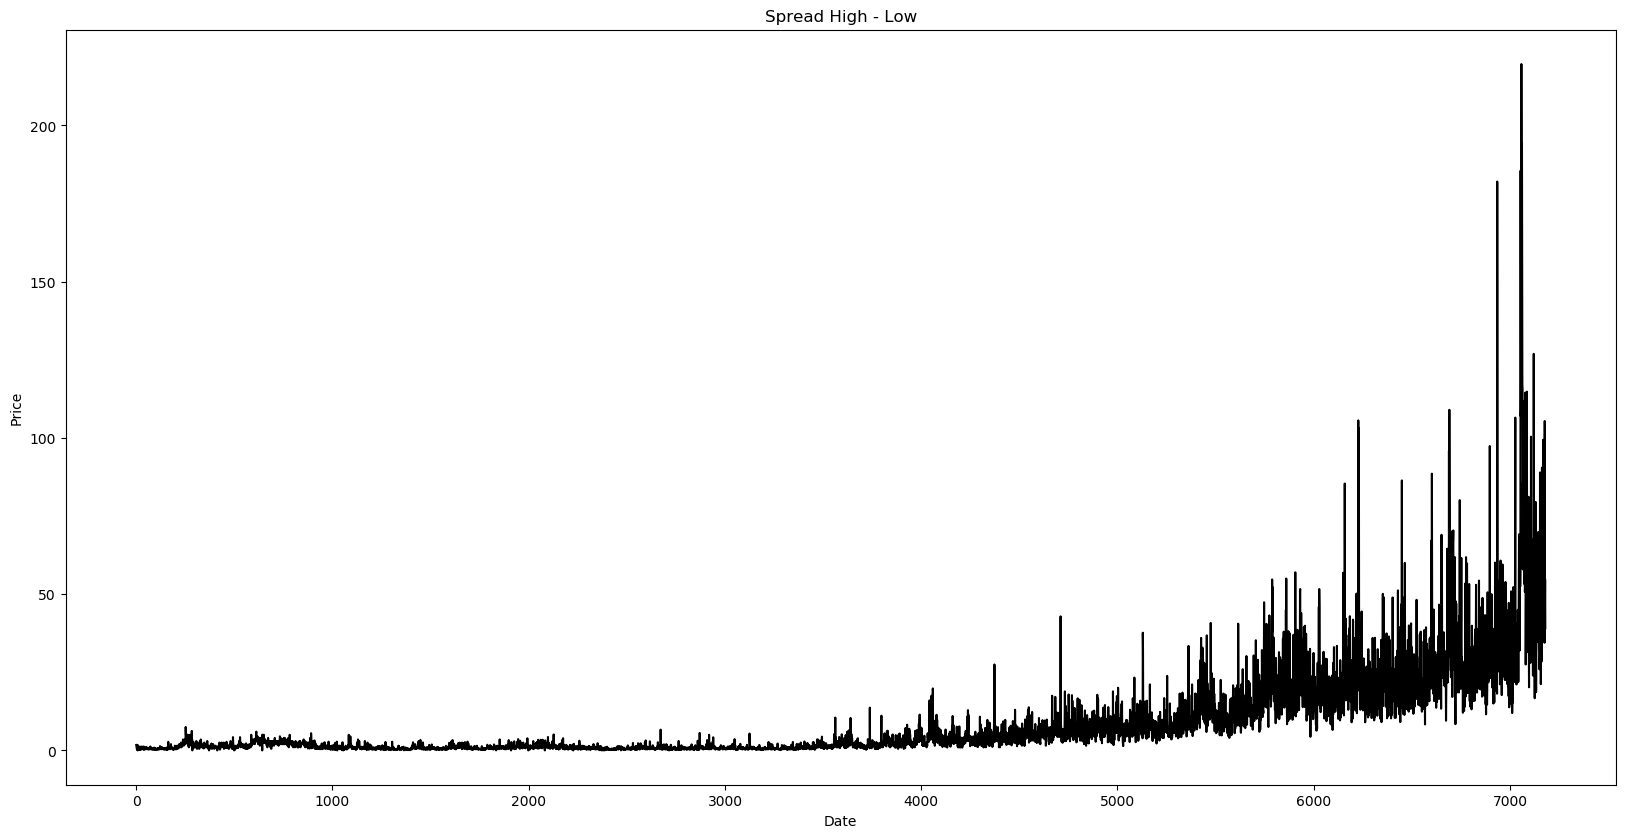

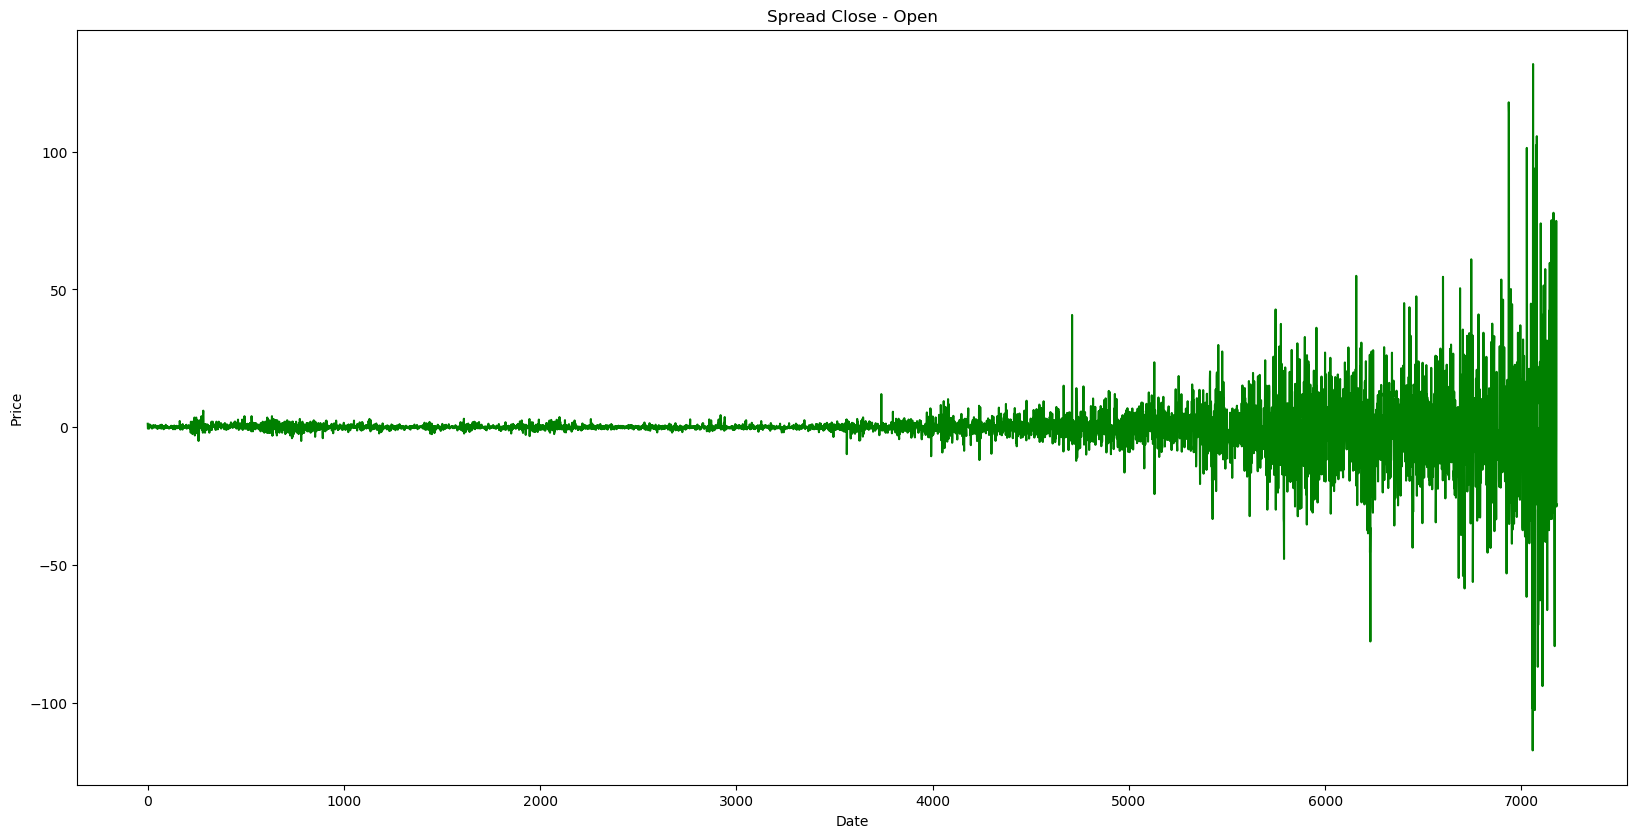

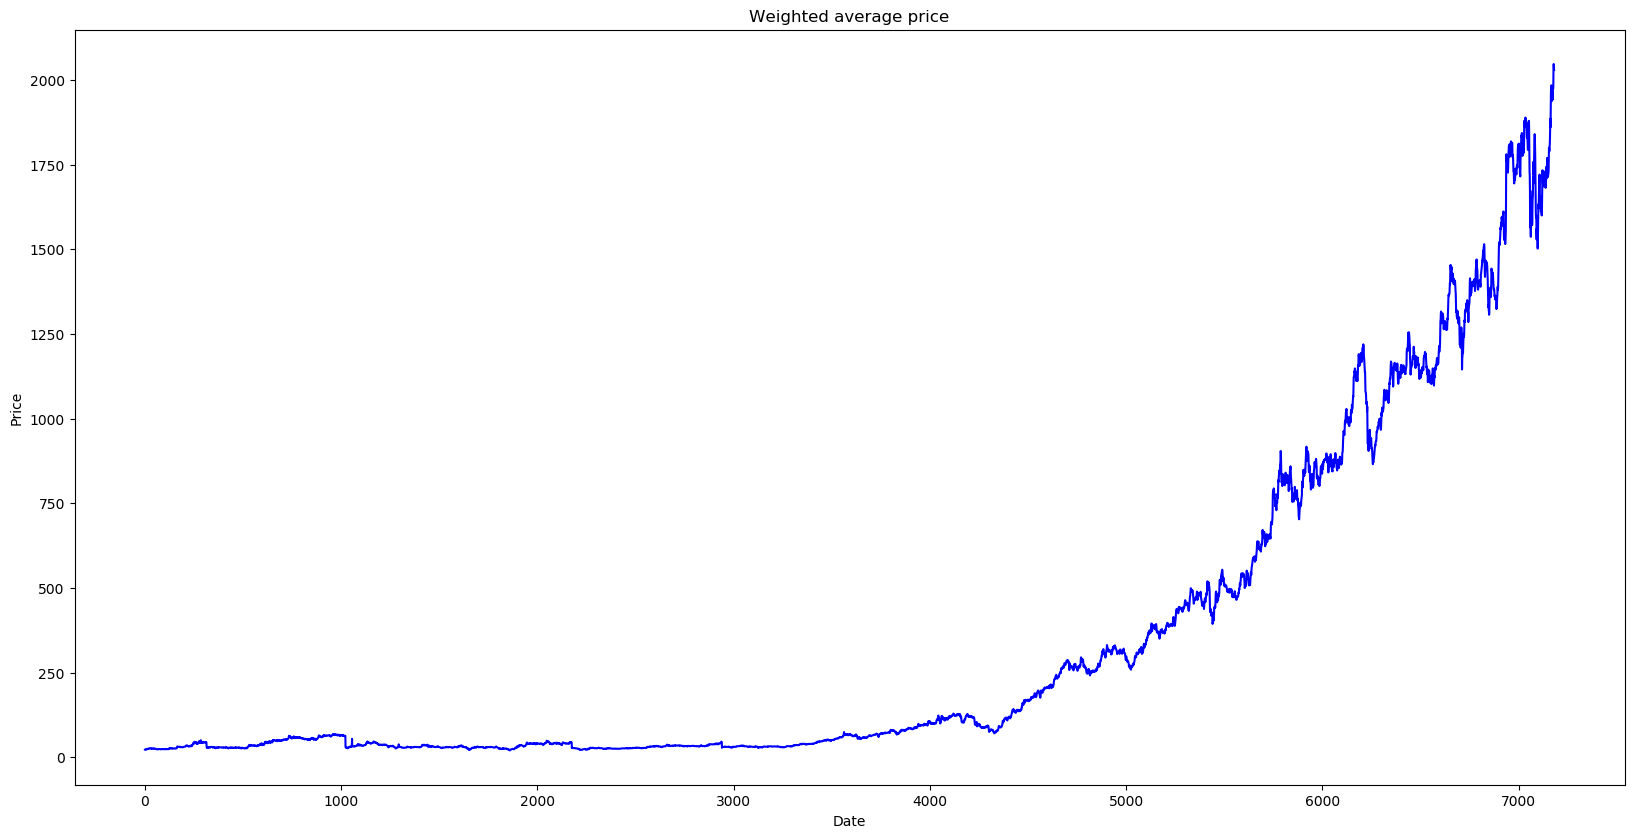

In [14]:
plot_df(df=ASIANPAINTS,x=ASIANPAINTS.index,y=ASIANPAINTS['Spread H-L'], title="Spread High - Low", xlabel="Date", ylabel="Price", color="black")
plot_df(df=ASIANPAINTS,x=ASIANPAINTS.index,y=ASIANPAINTS['Spread C-O'], title="Spread Close - Open", xlabel="Date", ylabel="Price", color="green")
plot_df(df=ASIANPAINTS,x=ASIANPAINTS.index,y=ASIANPAINTS['OHLC'], title="Weighted average price", xlabel="Date", ylabel="Price", color="blue")

In [15]:
ASIANPAINTS.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,OHLC
0,1991-01-03,21.50,23.25,21.50,22.750,0.0,0.0,0.0,0.0,NaN,NaN,1.75,1.250,22.25000
1,1991-01-07,23.25,23.25,22.00,22.750,0.0,0.0,0.0,0.0,NaN,NaN,1.25,-0.500,22.81250
2,1991-01-09,22.75,23.00,22.50,22.875,0.0,0.0,0.0,0.0,NaN,NaN,0.50,0.125,22.78125
3,1991-01-11,22.50,23.00,22.50,23.000,0.0,0.0,0.0,0.0,NaN,NaN,0.50,0.500,22.75000
4,1991-01-14,23.00,23.00,22.75,22.750,0.0,0.0,0.0,0.0,NaN,NaN,0.25,-0.250,22.87500


In [16]:
#ASIANPAINTS.reset_index(inplace=True)

ASIANPAINTS['Date']=pd.to_datetime(ASIANPAINTS['Date'])

ASIANPAINTS.sort_values('Date',axis=0,ascending=True, inplace=True)
ASIANPAINTS.head()

In [17]:
#df= ASIANPAINTS
df = ASIANPAINTS[:-20]
#df= ASIANPAINTS.loc[ASIANPAINTS.Month_year!=Month_year[-1],:]
test=ASIANPAINTS[-20:]


In [18]:
test.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,OHLC
7161,2020-08-19,1884.0,1902.10,1873.65,1885.70,1890.10,43889.0,2979.0,82954529.0,7365.0,16.78,28.45,1.70,1886.3625
7162,2020-08-20,1870.0,1880.00,1817.80,1875.25,1866.86,26325.0,2056.0,49145096.0,4602.0,17.48,62.20,5.25,1860.7625
7163,2020-08-21,1880.5,1971.00,1880.50,1958.35,1932.32,203246.0,11873.0,392736782.0,48253.0,23.74,90.50,77.85,1922.5875
7164,2020-08-24,1956.5,1994.75,1940.00,1963.25,1968.01,110157.0,7487.0,216789876.0,22488.0,20.41,54.75,6.75,1963.6250
7165,2020-08-25,1956.0,2015.95,1956.00,2001.00,1989.75,98984.0,7872.0,196953042.0,31915.0,32.24,59.95,45.00,1982.2375


In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [20]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['OHLC'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df['OHLC'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.0721182047169675
p-value: 1.0
Critial Values:
   1%, -3.4312679984792975
Critial Values:
   5%, -2.8619456827042837
Critial Values:
   10%, -2.5669859408069446

KPSS Statistic: 13.926288
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\e4nwck2\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\e4nwck2\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


# How to test for seasonality of a time series?
The common way is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar:

- Hour of day
- Day of month
- Weekly
- Monthly
- Yearly

However, if you want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. More on the ACF in the upcoming sections. But when there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

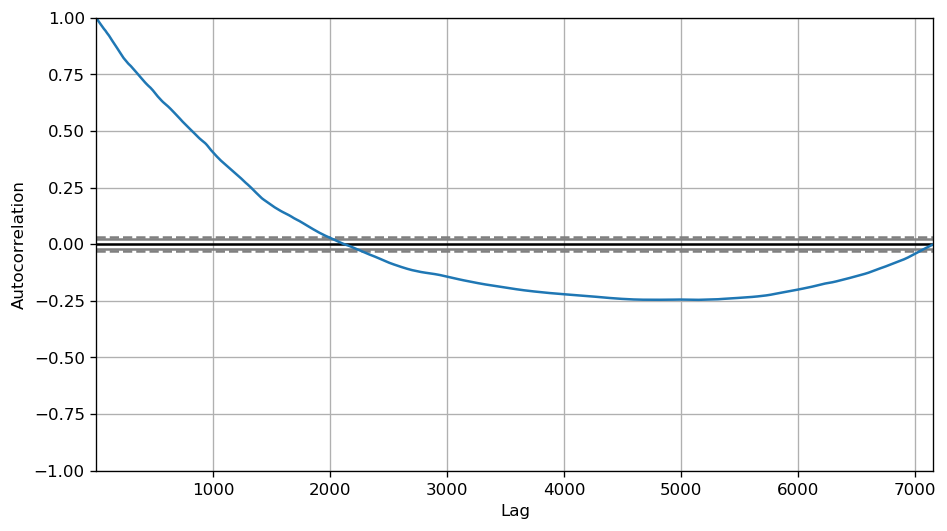

In [21]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.OHLC.tolist())

In [22]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

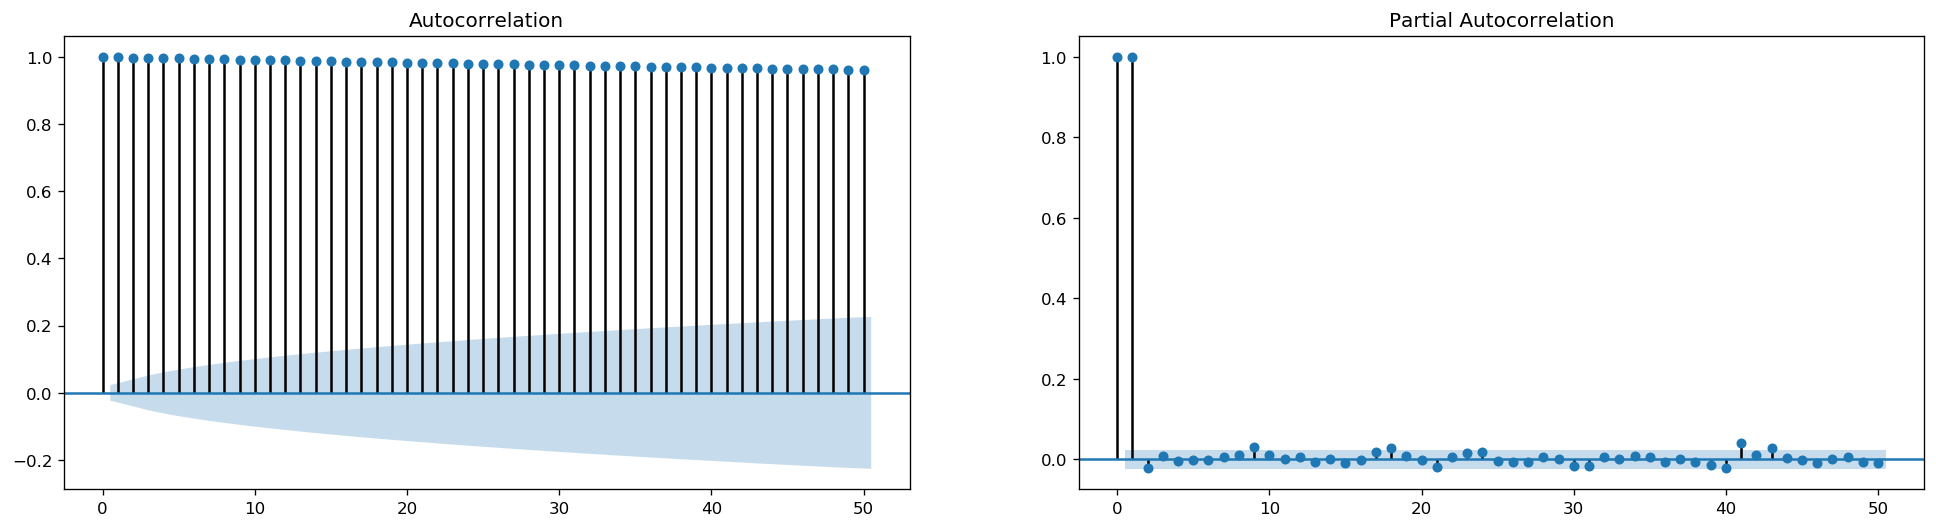

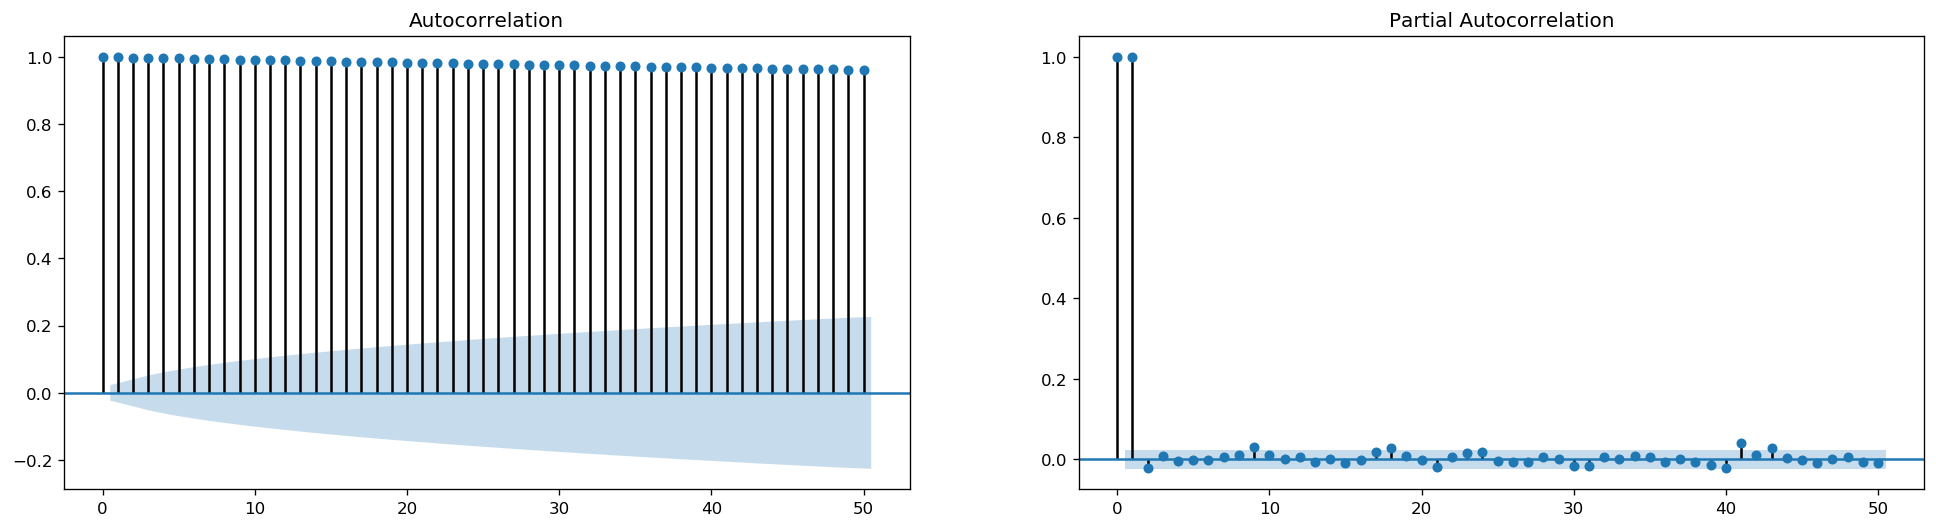

In [23]:
# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(20,5))
plot_acf(df.OHLC.tolist(), lags=50, ax=axes[0])
plot_pacf(df.OHLC.tolist(), lags=50, ax=axes[1])

# ARIMA


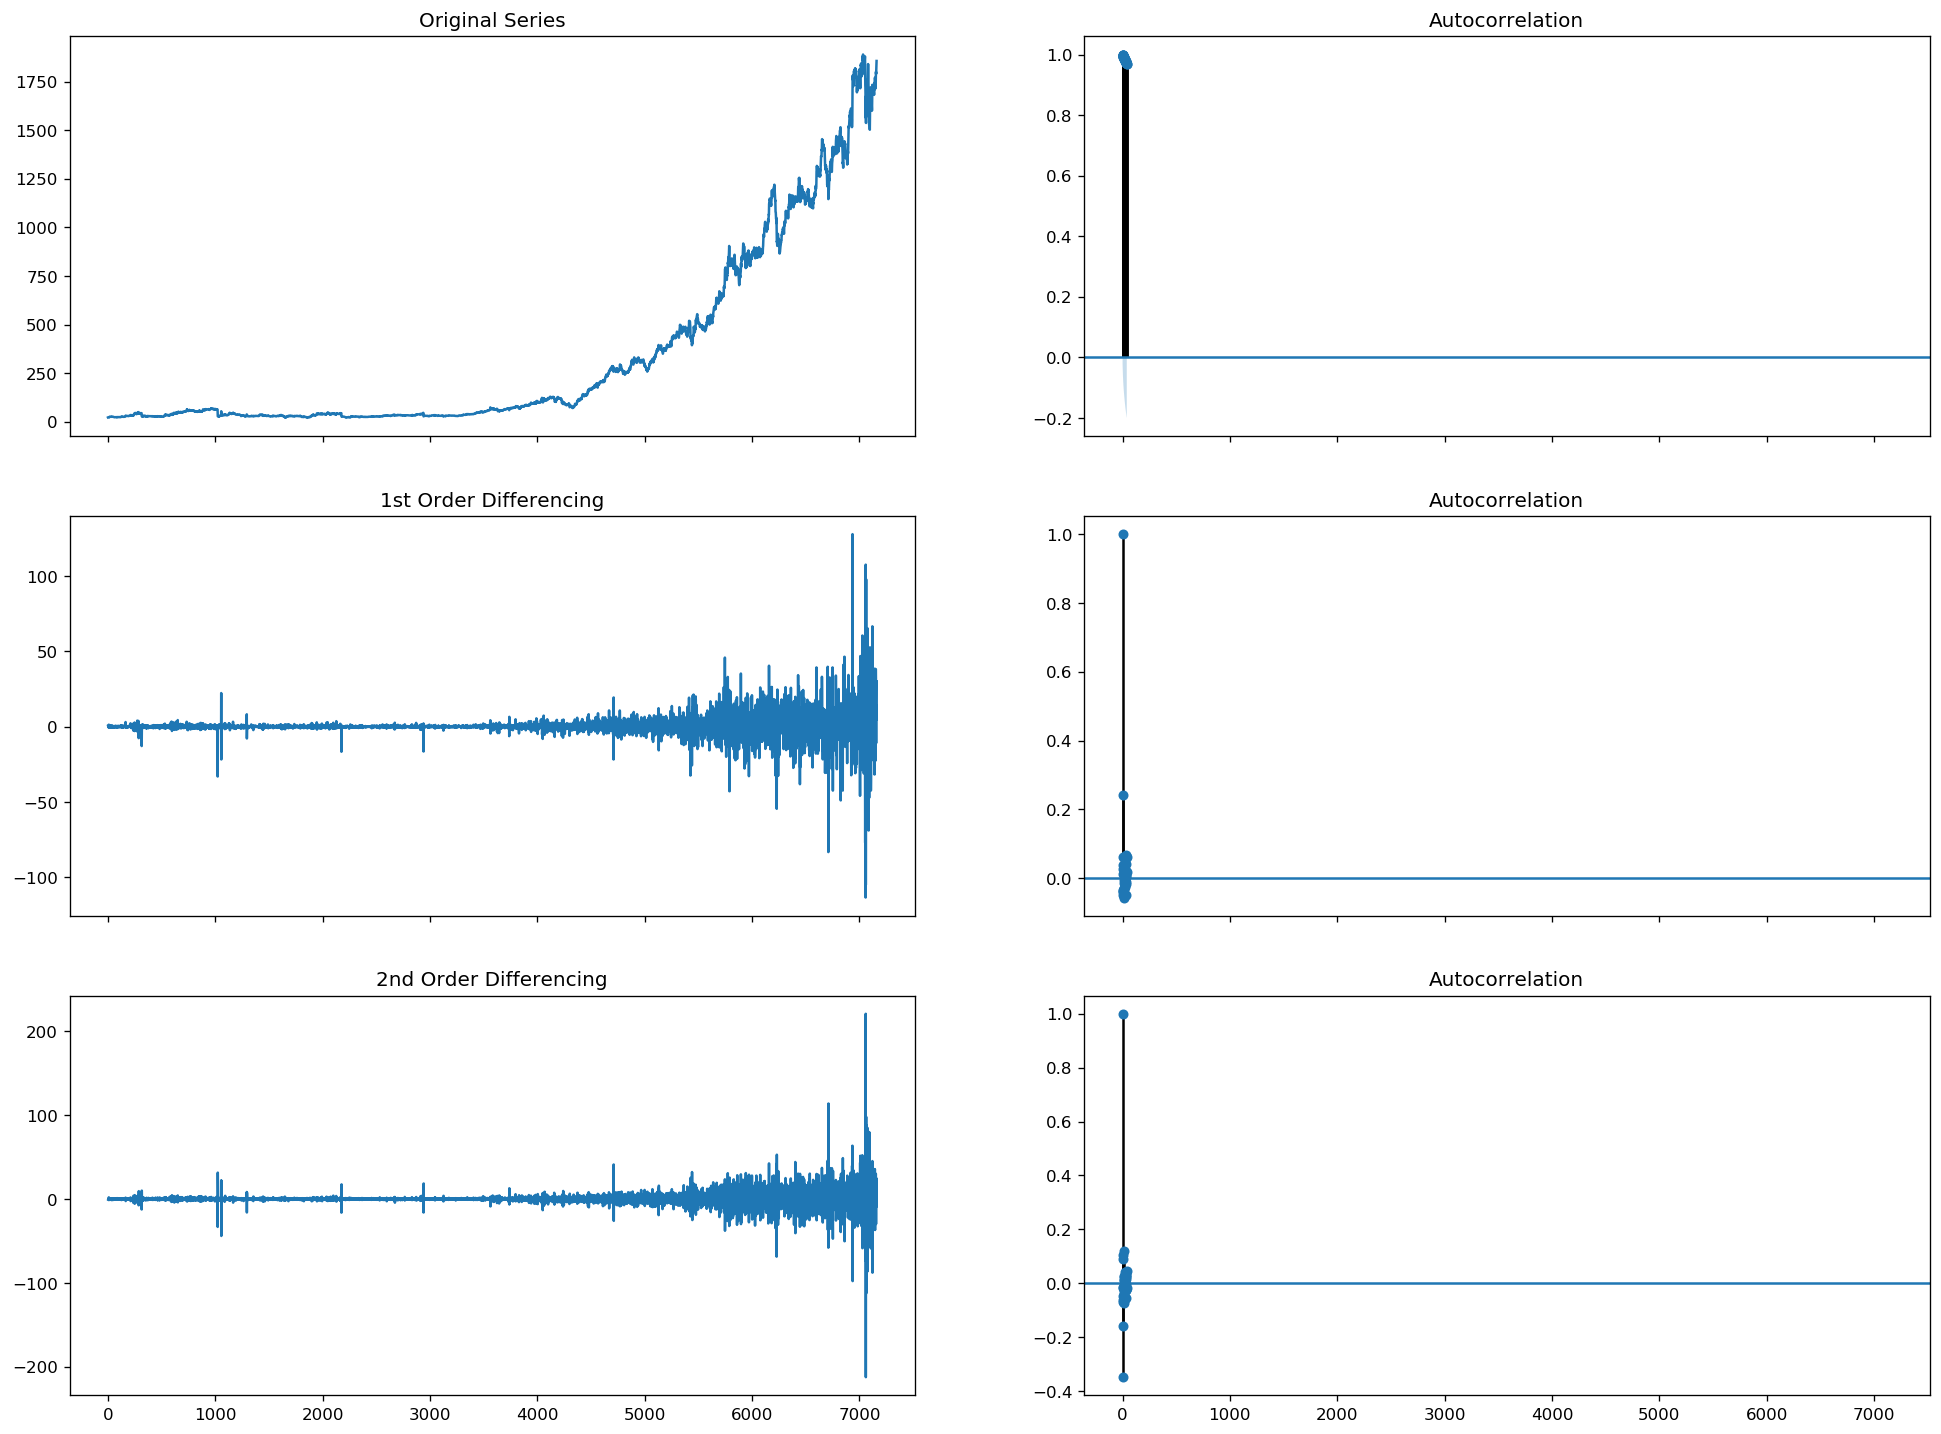

In [24]:
plt.rcParams.update({'figure.figsize':(20,15), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.OHLC); axes[0, 0].set_title('Original Series')
plot_acf(df.OHLC, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.OHLC.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.OHLC.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.OHLC.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.OHLC.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

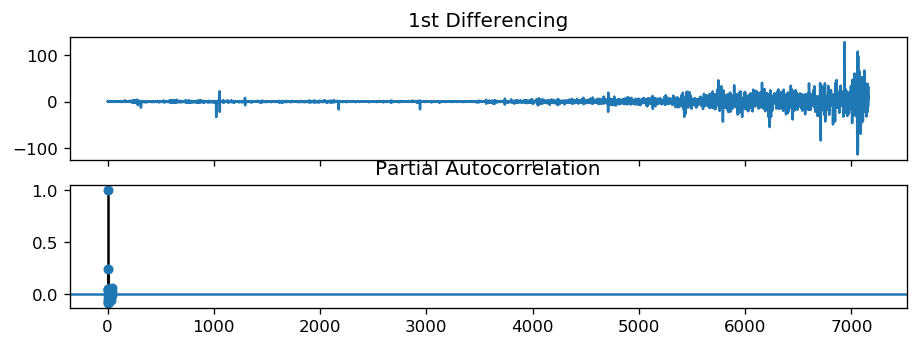

In [25]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(df.OHLC.diff()); axes[0].set_title('1st Differencing')

plot_pacf(df.OHLC.diff().dropna(), ax=axes[1])

plt.show()

In [26]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score,max_error

#rms = sqrt(mean_squared_error(test.OHLC,fc[0:20]))
#print(rms)

In [35]:
model = auto_arima(df.WAP[4000:], trace=True, seasonal = True, m=5,error_action='ignore', suppress_warnings=True,max_p =5, max_q=5,max_d=5,max_P=5,max_D=5,max_Q=5)
model.fit(df.WAP[4000:])
fc= model.predict(len(test.WAP))
rms = sqrt(mean_squared_error(test.WAP,fc))
print(rms)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=37122.308, Time=9.03 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=37117.294, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=37115.174, Time=0.55 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=37115.098, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=37115.323, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=37117.134, Time=0.35 sec
 ARIMA(0,1,1)(1,0,1)[5] intercept   : AIC=37117.076, Time=1.56 sec
 ARIMA(0,1,1)(0,0,2)[5] intercept   : AIC=37117.071, Time=0.86 sec
 ARIMA(0,1,1)(1,0,0)[5] intercept   : AIC=37115.130, Time=0.52 sec
 ARIMA(0,1,1)(1,0,2)[5] intercept   : AIC=37119.010, Time=1.08 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=37115.144, Time=0.41 sec
 ARIMA(1,1,1)(0,0,1)[5] intercept   : AIC=37116.943, Time=2.84 sec
 ARIMA(0,1,2)(0,0,1)[5] intercept   : AIC=37116.711, Time=0.88 sec
 ARIMA(1,1,0)(0,0,1)[5] intercept   : AIC=37115.143, Time=0.46 sec
 ARIMA(1,1,2)(0,0,1

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 3161
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 5)   Log Likelihood              -18553.562
Date:                           Wed, 16 Sep 2020   AIC                          37113.124
Time:                                   21:35:19   BIC                          37131.299
Sample:                                        0   HQIC                         37119.644
                                          - 3161                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0258      0.015      1.770      0.077      -0.003       0.054
ma.S.L5        0.0359      0.012      2.942      0.003       0.012       0.060
sigma2      7385.8580      8.037    918.940      0.000    7370.105    7401.611
===================================================================================
Ljung-Box (Q):                       19.90   Jarque-Bera (JB):         861251452.01
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                           -47.97
Prob(H) (two-sided):                  0.00   Kurtosis:                      2558.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

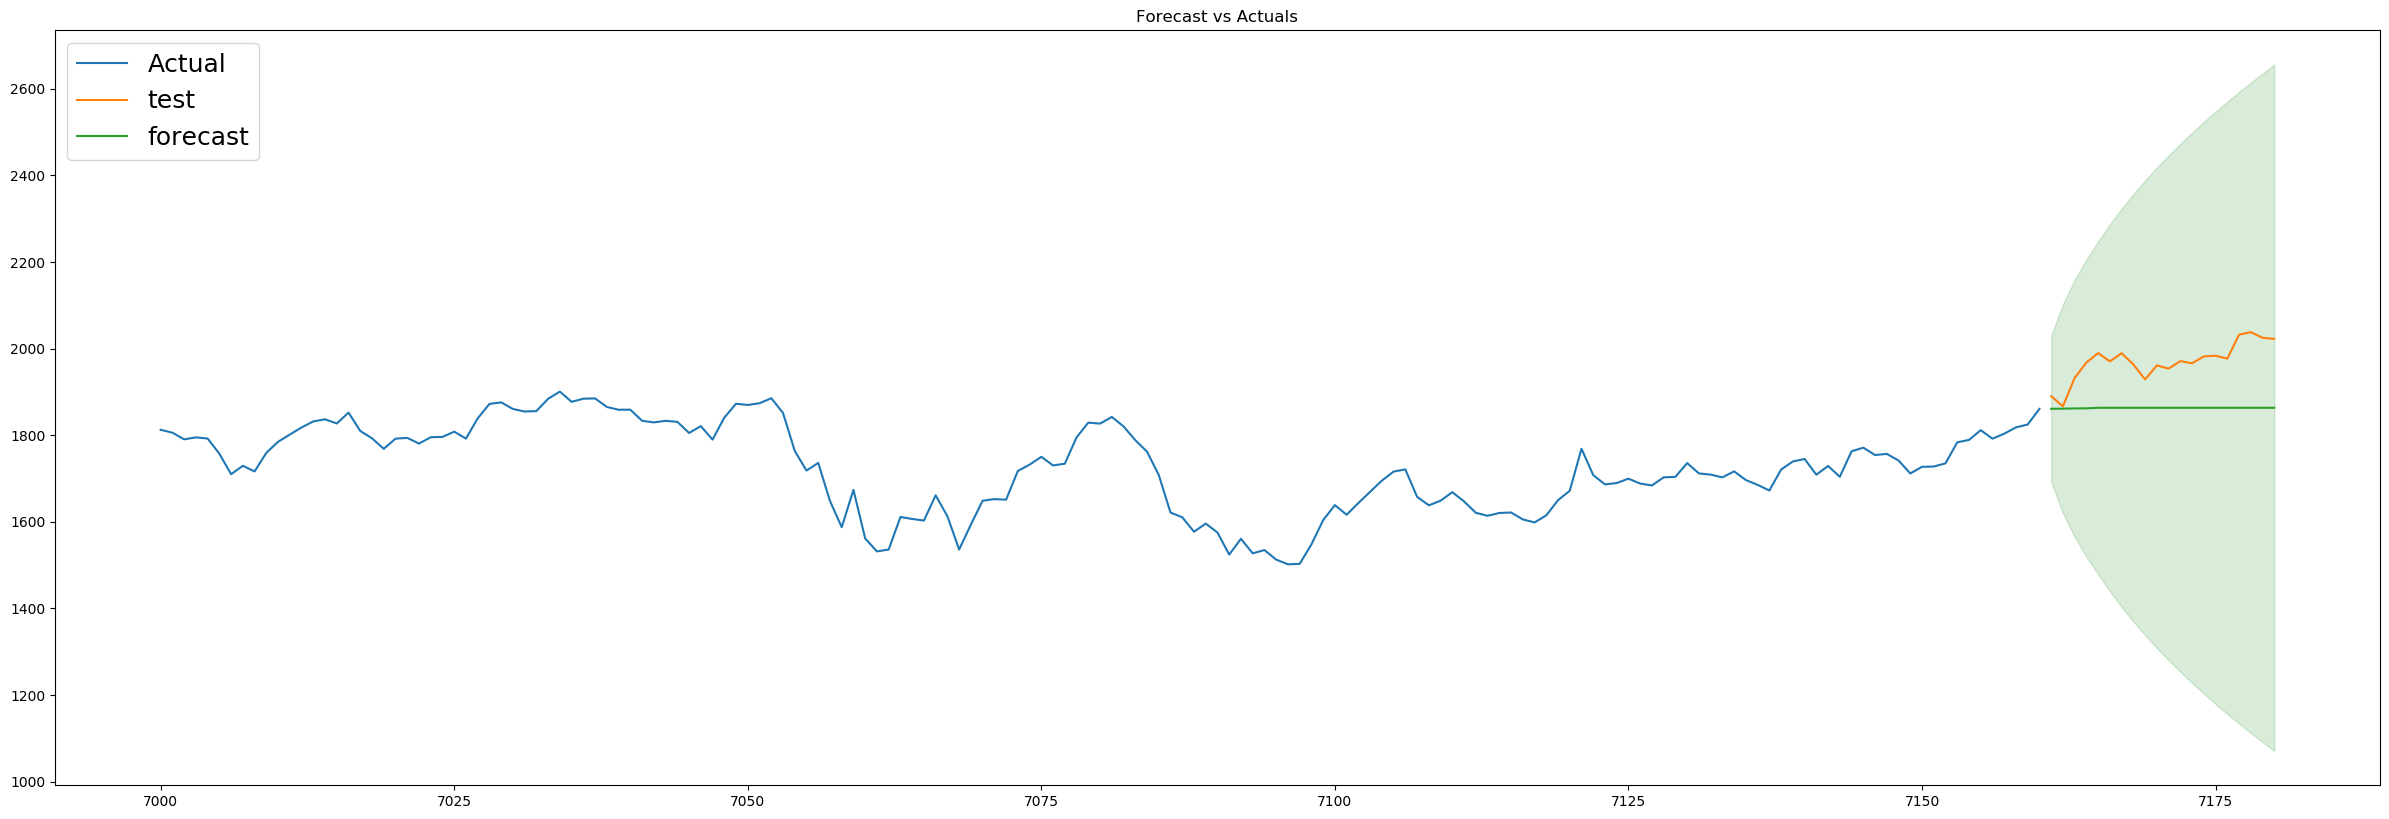

In [41]:
fc,conf = model.predict(len(test.WAP),return_conf_int=True,alpha=0.05)

fc_series = pd.Series(fc,index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(30,10), dpi=100)
plt.plot(df.WAP[7000:], label='Actual')
plt.plot(test.WAP, label='test')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='g', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=18)
plt.show()

In [38]:
test

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,OHLC
7161,2020-08-19,1884.00,1902.10,1873.65,1885.70,1890.10,43889.0,2979.0,82954529.0,7365.0,16.78,28.45,1.70,1886.3625
7162,2020-08-20,1870.00,1880.00,1817.80,1875.25,1866.86,26325.0,2056.0,49145096.0,4602.0,17.48,62.20,5.25,1860.7625
7163,2020-08-21,1880.50,1971.00,1880.50,1958.35,1932.32,203246.0,11873.0,392736782.0,48253.0,23.74,90.50,77.85,1922.5875
7164,2020-08-24,1956.50,1994.75,1940.00,1963.25,1968.01,110157.0,7487.0,216789876.0,22488.0,20.41,54.75,6.75,1963.6250
7165,2020-08-25,1956.00,2015.95,1956.00,2001.00,1989.75,98984.0,7872.0,196953042.0,31915.0,32.24,59.95,45.00,1982.2375
7166,2020-08-26,2002.00,2009.40,1956.00,1971.05,1970.65,88476.0,6259.0,174354889.0,30504.0,34.48,53.40,-30.95,1984.6125
7167,2020-08-27,1976.50,2008.40,1970.35,1982.00,1989.41,55384.0,3867.0,110181575.0,7855.0,14.18,38.05,5.50,1984.3125
7168,2020-08-28,1996.00,1997.95,1954.35,1957.70,1963.45,43587.0,3019.0,85580823.0,14105.0,32.36,43.60,-38.30,1976.5000
7169,2020-08-31,1982.90,1982.90,1883.50,1903.40,1928.87,50229.0,4171.0,96885241.0,16239.0,32.33,99.40,-79.50,1938.1750
7170,2020-09-01,1923.00,1986.85,1911.00,1978.20,1961.30,87871.0,6930.0,172341431.0,31220.0,35.53,75.85,55.20,1949.7625


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression